In [1]:
import pandas as pd

In [3]:
house= pd.read_excel("http://byungwan.com/class/House_Prices.xls")
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
house["House_Class"] = pd.qcut(house["Price"],2,labels=["Low","High"])

In [6]:
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,House_Class
0,1,114300,1790,2,2,2,No,East,Low
1,2,114200,2030,4,2,3,No,East,Low
2,3,114800,1740,3,2,1,No,East,Low
3,4,94700,1980,3,2,3,No,East,Low
4,5,119800,2130,3,3,3,No,East,Low


In [7]:
house = pd.get_dummies(house, columns =["Brick", "Neighborhood"],drop_first= True)

In [8]:
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,House_Class,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,Low,0,0,0
1,2,114200,2030,4,2,3,Low,0,0,0
2,3,114800,1740,3,2,1,Low,0,0,0
3,4,94700,1980,3,2,3,Low,0,0,0
4,5,119800,2130,3,3,3,Low,0,0,0


In [11]:
y = house.iloc[:,6]
x = house.iloc[:,[2,3,4,5,7,8,9]]

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(criterion = "entropy", n_estimators =5, random_state = 0)

# max_depth=5, add them sau entropy cũng được if you believe dùng randomforest still causes overfitting
#n_estimators: number of trees you want to generate from the same training samples

In [17]:
rfc_model = rfc.fit(x_train, y_train)

In [21]:
y_pred = rfc_model.predict(x_test)

In [22]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)  #how much we can trust the prediction - 79%

0.7948717948717948

##  Visualization 

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [33]:
tree0 = rfc_model.estimators_[0]

<function matplotlib.pyplot.show(close=None, block=None)>

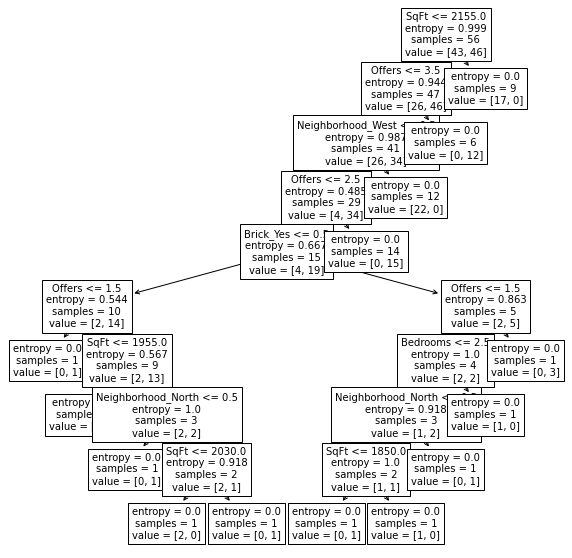

In [34]:
plt.figure(figsize =(10,10))
plot_tree(tree0, feature_names = x.columns, fontsize=10)
plt.show

In [39]:
tree1 = rfc_model.estimators_[1]

<function matplotlib.pyplot.show(close=None, block=None)>

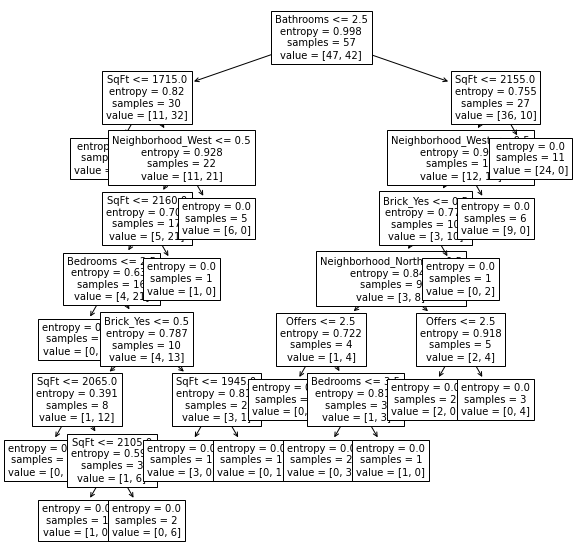

In [40]:
plt.figure(figsize =(10,10))
plot_tree(tree1, feature_names = x.columns, fontsize=10)
plt.show

In [38]:
tree2 = rfc_model.estimators_[2]

<function matplotlib.pyplot.show(close=None, block=None)>

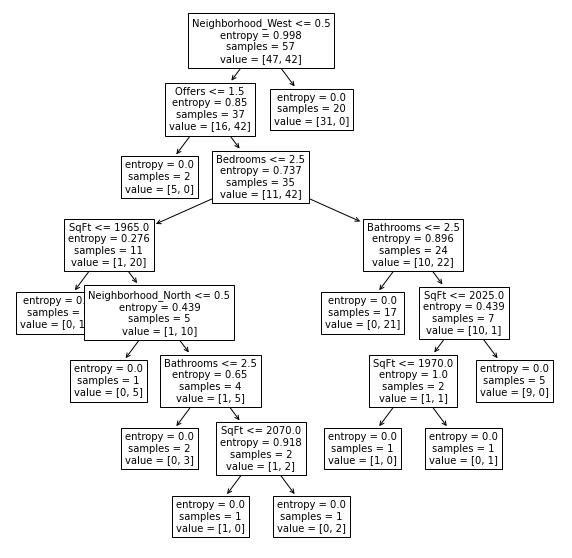

In [41]:
plt.figure(figsize =(10,10))
plot_tree(tree2, feature_names = x.columns, fontsize=10)
plt.show

#cái value là đứng trước là số lương High và Low value

## Feature Importance

importance of each variables, feature is variables

In [45]:
fi = rfc_model.feature_importances_
fi

array([0.25272959, 0.06093356, 0.12489526, 0.10327389, 0.01458181,
       0.09140686, 0.35217904])

In [49]:
pd.DataFrame(fi, index =x.columns, columns=["Feature Importance"])

,Feature Importance
SqFt,0.252730
Bedrooms,0.060934
Bathrooms,0.124895
Offers,0.103274
Brick_Yes,0.014582
Neighborhood_North,0.091407
Neighborhood_West,0.352179


the number just says how much the variables is used, how important it is in making the prediction yet it does not tell the relationshop between variables like in regression model 

## # Of Features

In [51]:
rfc = RandomForestClassifier(criterion = "entropy", n_estimators =5, random_state = 0, 
                            max_features = 7)
#max_features: the number of variables get considered and chosen for prediction in each layer

In [52]:
rfc_model2= rfc.fit (x_train, y_train)

In [53]:
y_pred= rfc_model2.predict(x_test)

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.7435897435897436